# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.patches import Rectangle

%matplotlib inline

2021-12-08 22:28:33.756378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 22:28:33.756414: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/antonio/Proyectos/Desarrollo/Nano-Degree/venv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = get_dataset("/home/antonio/Proyectos/Desarrollo/Nano-Degree/object-detection/data/waymo/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/antonio/Proyectos/Desarrollo/Nano-Degree/object-detection/data/waymo/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/antonio/Proyectos/Desarrollo/Nano-Degree/object-detection/data/waymo/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 75
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.


2021-12-08 22:29:01.127435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-08 22:29:01.127486: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-08 22:29:01.127526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Disinglab0): /proc/driver/nvidia/version does not exist
2021-12-08 22:29:01.141581: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
        
    
    class Classes(Enum):
        CAR = 1
        PEDESTRIAN = 2
        BICYCLE = 4
    classes_color = {Classes.CAR.value: [1, 0, 0], Classes.PEDESTRIAN.value: [0, 1, 0], Classes.BICYCLE.value: [0, 0, 1]}
    
    fig, ax = plt.subplots(2, 5, figsize=(10, 5))

    data_counter=0
    
    for data in batch:
        x = data_counter % 2
        y = data_counter % 5
                
        ax[x, y].imshow(data['image'])
        ax[x ,y].axis('off')
        
        image_height = data['image'].shape[0]
        image_width = data['image'].shape[1]
        
        for cl, bounding_box in zip(data['groundtruth_classes'].numpy(), data['groundtruth_boxes'].numpy()):
            y1, x1, y2, x2 = bounding_box
            y1 *= image_height
            x1 *= image_width
            y2 *= image_height
            x2 *= image_width            
            
            rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=classes_color[cl])
            ax[x, y].add_patch(rec)
             
        data_counter += 1
        
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

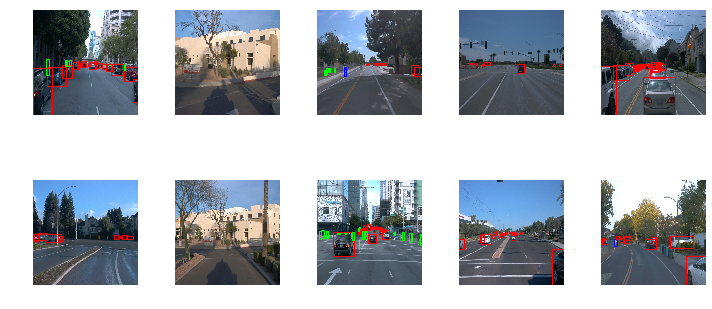

In [5]:
## STUDENT SOLUTION HERE

batch = dataset.shuffle(75).take(10)
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [3]:
def get_classes_distribution(dataset):
    
    data_counter=0

    class Classes(Enum):
        CAR = 1
        PEDESTRIAN = 2
        BICYCLE = 4

    dataset_size = len(list(dataset))
    
    classes_distribution = []

    car_counter = 0
    pedestrian_counter = 0
    bicycle_counter = 0
    
    for data in dataset:
        car = 0
        pedestrian = 0
        bicycle = 0
        
        for cl in zip(data['groundtruth_classes']):
                        
            if cl[0] == Classes.CAR.value:
                car += 1
            else:
                if cl[0] == Classes.PEDESTRIAN.value:
                    pedestrian += 1
                else:    
                    if cl[0] == Classes.BICYCLE.value:
                        bicycle += 1
                        
             
        data_counter += 1
    
        classes_distribution.append([car, pedestrian, bicycle])
    
        car_counter += car
        pedestrian_counter += pedestrian
        bicycle_counter += bicycle
        
    
    
    total_events = car_counter + pedestrian_counter + bicycle_counter
    
    frequencies = np.array([car_counter, pedestrian_counter, bicycle_counter])
    
    proportions = np.array([frequencies[0]/total_events, frequencies[1]/total_events, 
                            frequencies[2]/total_events])
    
    percentaje = np.array([proportions[0] * 100, proportions[1] * 100, 
                           proportions[2] * 100])
    
    
    distribution = np.array(classes_distribution)
    
    fig = plt.figure("Frequencies")
    ax = fig.add_axes([0,0,1,1])
    labels = np.array(['Cars', 'Pedestrian', 'Bicycles'])
    ax.set_ylabel('Number of detections')
    ax.set_xlabel('Classes')
    ax.set_title('Classes Frequencies') 
    ax.bar(labels, frequencies)
    
    for index, data in enumerate(frequencies):
        plt.text(x=index , y =data , s=f"{data}")
    
    
    fig2 = plt.figure("Percentages")
    plt.suptitle("Classes Percentages")
    plt.pie(percentaje, labels=labels, autopct="%0.1f %%")
    plt.show()

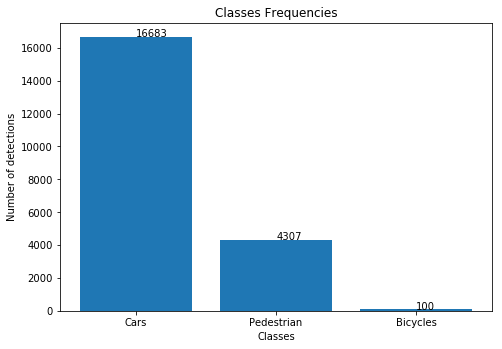

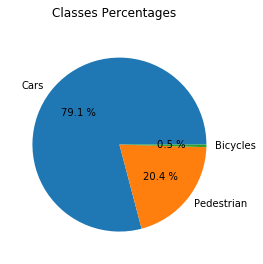

In [4]:
batch = dataset.shuffle(2000).take(1000)
get_classes_distribution(batch)

## Data distribution:

The data we are using for this notebook from the **Waymo Open Dataset** is **Nominal Data**, therefore we are going to analyze the frequency each class appears on the dataset and the percentages each class represents from the total amounts of objects count in the dataset.

For this step, we are going to pick 2000 images at random for the total dataset and use a sample of 1000 images to analyze the distribution of the classes.

We have the following 3 classes:

-**CARS**<br>
-**PEDESTRIANS**<br> 
-**BICYCLES**<br>

We can see on the graphics above that the **CAR** class has a bigger frequency with more than 16683 appearances, representing the 79.1% of every object counted in the sample. **PEDESTRIANS** represent the second most frequent data found on the sample with around 4307 appearances, representing 20.4% of the classes. Lastly, we have the **BICYCLES** class with less than 100 objects counted in this class representing the 0.5% of the data.

With this result, we can say that we should expect more vehicles than other objects on the dataset. Than means that **PEDESTRIANS** and **BICYCLE** classes could need more variance in order to train correctly or ML algorithms.